## DATA 440 Technical Report
### Using MLP Classifier to Predict Spam
Dataset: https://www.openml.org/d/44

In [15]:
# Importing needed libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix


### Data Ingestion and Cleaning

In [2]:
spambase = fetch_openml(name="spambase", as_frame=True)
df = spambase.frame

In [3]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
df.shape

(4601, 58)

#### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   word_freq_make              4601 non-null   float64 
 1   word_freq_address           4601 non-null   float64 
 2   word_freq_all               4601 non-null   float64 
 3   word_freq_3d                4601 non-null   float64 
 4   word_freq_our               4601 non-null   float64 
 5   word_freq_over              4601 non-null   float64 
 6   word_freq_remove            4601 non-null   float64 
 7   word_freq_internet          4601 non-null   float64 
 8   word_freq_order             4601 non-null   float64 
 9   word_freq_mail              4601 non-null   float64 
 10  word_freq_receive           4601 non-null   float64 
 11  word_freq_will              4601 non-null   float64 
 12  word_freq_people            4601 non-null   float64 
 13  word_freq_report  

### Since all features are numerical, there is no need to use OneHotEncoding to change them into floats/ints

In [6]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


#### Checking and Replacing Null Values

In [7]:
df.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


#### Label Encoding
Class is stored as Category. Converting to Integer<br>
0 -> False (not spam)<br>
1 -> True (spam)

In [8]:
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])

df["class"].dtype

dtype('int64')

#### Data Preprocessing
Separating 'Class' from features

In [9]:
X = df.drop(columns=["class"])
y = df["class"]

X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [10]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


#### Dividing data into training and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
X_train.shape

(3220, 57)

In [12]:
X_test.shape

(1381, 57)

#### Model Fitting (Multi-Layer Perceptron Classifier)

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(15,15,15), activation='relu', solver='adam', max_iter=2000)

mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

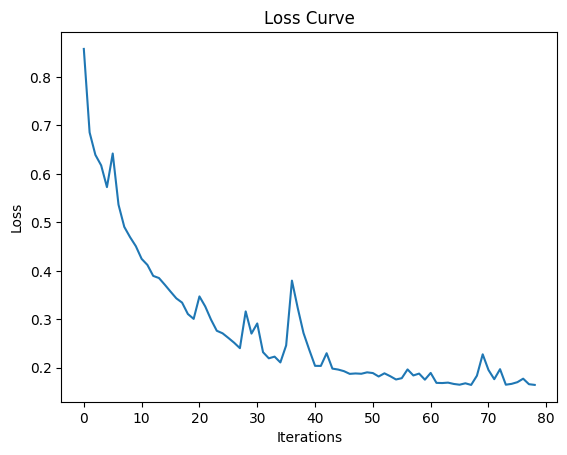

In [17]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

#### Classification Report & Confusion Matrix

Confusion Matrix: Training

In [19]:
cm_train = confusion_matrix(y_train, predict_train)
print(cm_train)

[[1923   61]
 [ 179 1057]]


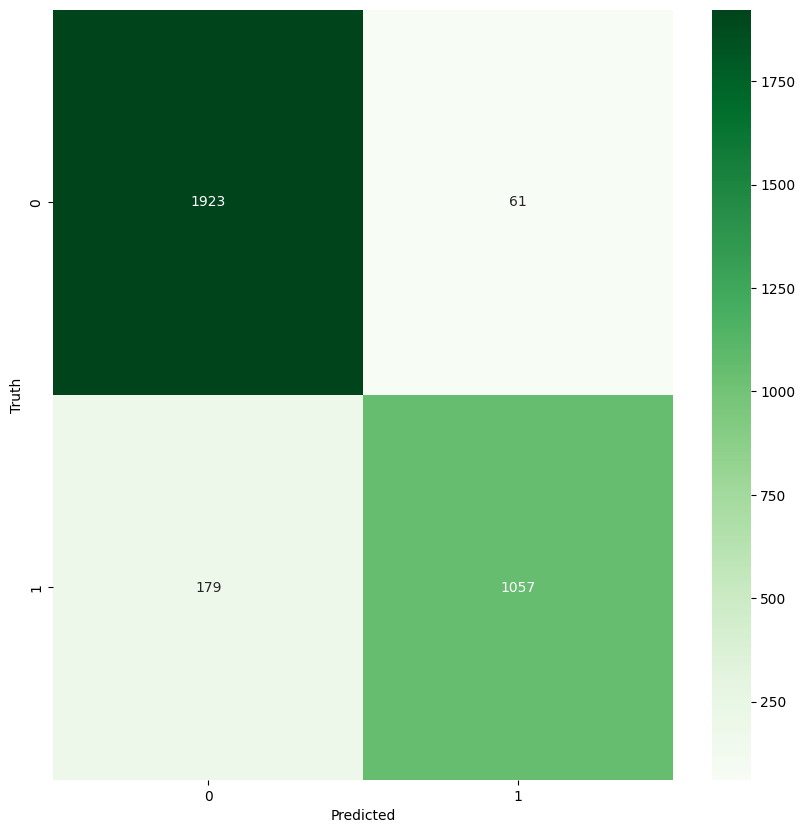

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_train, annot=True, fmt="g", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Confusion Matrix: Testing

In [21]:
cm_test = confusion_matrix(y_test, predict_test)
print(cm_test)

[[769  35]
 [107 470]]


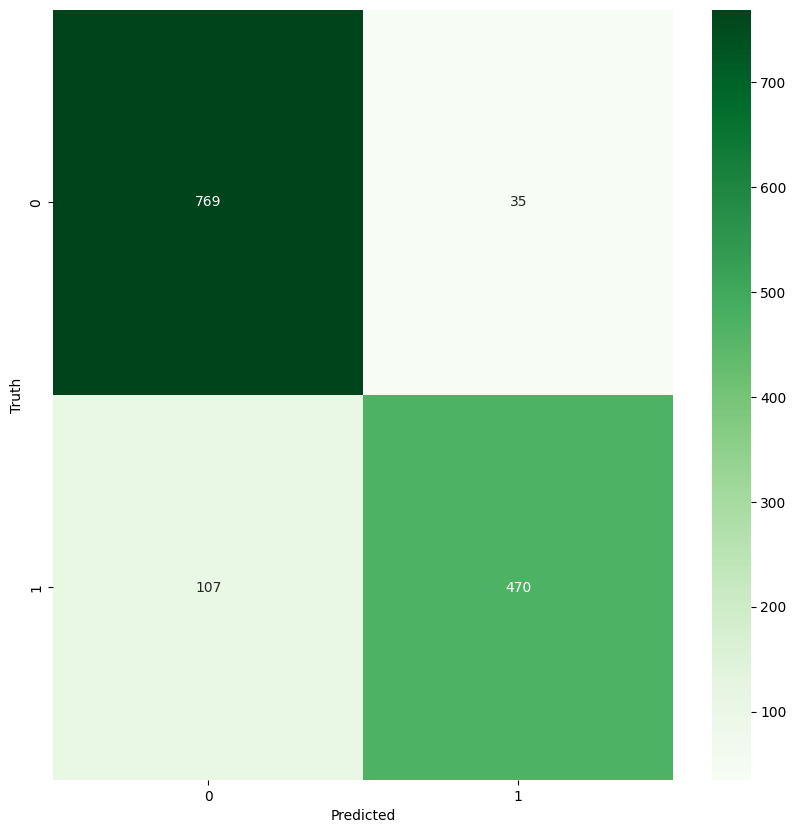

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_test, annot=True, fmt="g", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Classification Report

In [23]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       804
           1       0.93      0.81      0.87       577

    accuracy                           0.90      1381
   macro avg       0.90      0.89      0.89      1381
weighted avg       0.90      0.90      0.90      1381



#### Model Fitting (Increasing neurons from 15 -> 20, for up to 5000 iterations)

In [24]:
mlp5k = MLPClassifier(hidden_layer_sizes=(20,20,20), activation='relu', solver='adam', max_iter=5000)

mlp5k.fit(X_train, y_train)

predict_train5k = mlp5k.predict(X_train)
predict_test5k = mlp5k.predict(X_test)

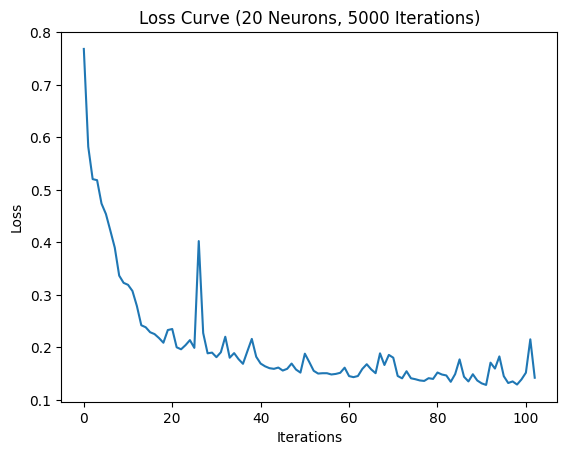

In [31]:
plt.plot(mlp5k.loss_curve_)
plt.title("Loss Curve (20 Neurons, 5000 Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

#### Classification Report & Confusion Matrix (5k)

Confusion Matrix: Training

In [25]:
cm_train5k = confusion_matrix(y_train, predict_train5k)
print(cm_train5k)

[[1923   61]
 [  77 1159]]


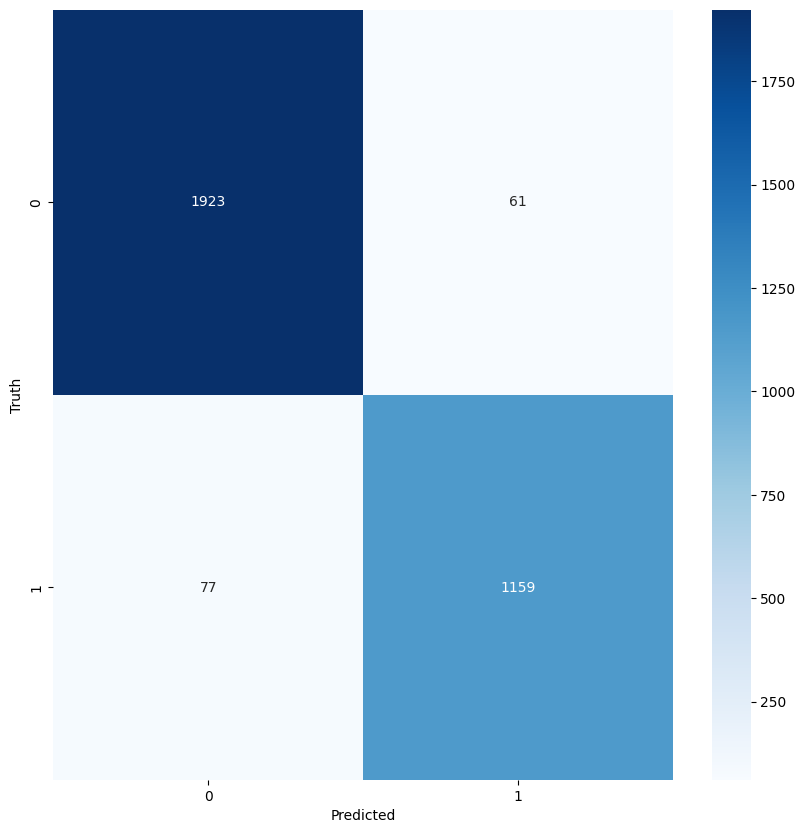

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_train5k, annot=True, fmt="g", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Confusion Matrix: Test

In [27]:
cm_test5k = confusion_matrix(y_test, predict_test5k)
print(cm_test5k)

[[766  38]
 [ 61 516]]


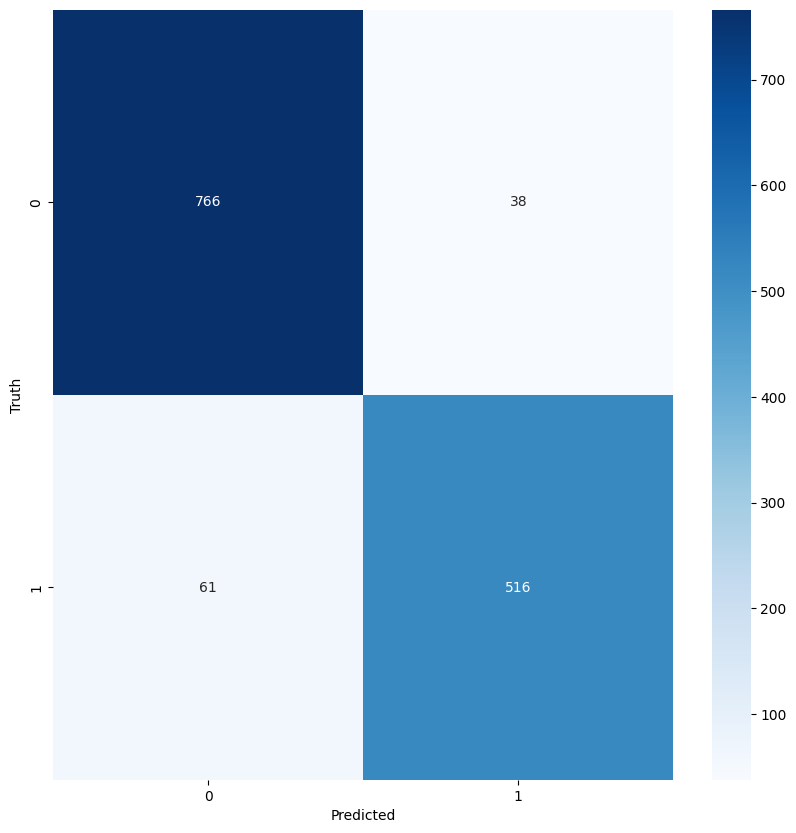

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_test5k, annot=True, fmt="g", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Classification Report

In [29]:
print(classification_report(y_test, predict_test5k))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       804
           1       0.93      0.89      0.91       577

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381

